In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin,fmin_bfgs

In [197]:
ex2data1 = pd.read_csv("ex2data1.txt",header=None,names=['exam1','exam2','admitted'])
ex2data1['pad'] =1
ex2data2 = pd.read_csv("ex2data2.txt",header=None,names=['test1','test2','accepted'])
ex2data2['pad'] =1
num_samples = ex2data1.shape[0]
print(num_samples)

100


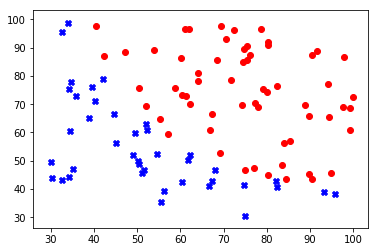

In [174]:
plt.scatter(ex2data1[ex2data1.admitted == True]['exam1'],
            ex2data1[ex2data1.admitted == True]['exam2'],
            color='red')
plt.scatter(ex2data1[ex2data1.admitted == False]['exam1'],
            ex2data1[ex2data1.admitted == False]['exam2'],
            color='blue',marker="X")

In [175]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

In [176]:
def h(theta,x):
    return sigmoid(x.dot(theta))

In [177]:
y_array = ex2data1['admitted'].values
X_array = ex2data1[['pad','exam1','exam2']].values

In [178]:
def cost(theta,X,y):
    return 1/num_samples*(-y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X))))

In [179]:
cost(np.zeros(3),X_array,y_array)

0.6931471805599453

In [180]:
def gradient(theta):
    return 1/num_samples*(y_array - h(theta,X_array)).dot(X_array)

In [181]:
theta_min = fmin(lambda z: cost(z,X_array,y_array),np.zeros(3),maxiter=400)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [182]:
def predict(theta,X):
    return np.ceil(h(theta,X)-0.5)

In [183]:
accuracy = np.sum(np.isclose(predict(theta_min,X_array),y_array).astype(int))/num_samples
accuracy

0.89

Decision boundary is given by $\hat\theta_0 + \hat\theta_1 x_1 + \hat\theta_2 x_2 = 0$, where $\hat\theta = \text{argmin}\, J(\mathbf{\theta})$

In [184]:
x_bdry = np.arange(30,100)
y_bdry = -1/theta_min[2]*(theta_min[0] + theta_min[1]*x_bdry)

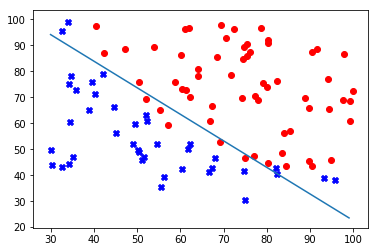

In [185]:
plt.scatter(ex2data1[ex2data1.admitted == True]['exam1'],
            ex2data1[ex2data1.admitted == True]['exam2'],
            color='red')
plt.scatter(ex2data1[ex2data1.admitted == False]['exam1'],
            ex2data1[ex2data1.admitted == False]['exam2'],
            color='blue',marker="X")
plt.plot(x_bdry,y_bdry)

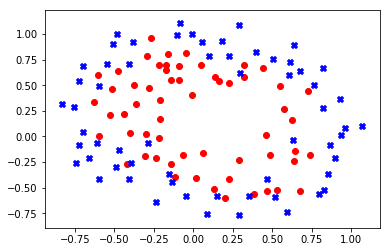

In [203]:
X2_array = ex2data2[['pad','test1','test2']].values
y2_array = ex2data2['accepted'].values
plt.scatter(ex2data2[ex2data2.accepted == True]['test1'],
            ex2data2[ex2data2.accepted == True]['test2'],
            color='red')
plt.scatter(ex2data2[ex2data2.accepted == False]['test1'],
            ex2data2[ex2data2.accepted == False]['test2'],
            color='blue',marker="X")

In [208]:
def cost_reg(theta,X,y,reg_lambda):
    log_loss = -y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X)))
    reg_term = 0.5*reg_lambda*np.sum(np.power(theta[1:],2))
    return 1/num_samples*(log_loss + reg_term)

In [209]:
theta_min_reg = fmin(lambda z: cost_reg(z,X2_array,y2_array,1),np.zeros(3),maxiter=400)

Optimization terminated successfully.
         Current function value: 0.814888
         Iterations: 104
         Function evaluations: 181


In [188]:
def feature_map(X,d):
    x1 = X[:,0]
    x2 = X[:,1]
    tmp_array = np.ones((x1.shape[0],int((d+1)*(d+2)/2)))
    for i in range(d+1):
        for j in range(i+1):
            tmp_array[:,int(i*(i+1)/2+j)] = np.multiply(np.power(x1,i-j),np.power(x2,j))
    return tmp_array

In [215]:
X2_mapped = feature_map(X2_array[:,1:],6)
X2_mapped.shape

(118, 28)

In [221]:
theta_min_mapped = fmin(lambda z: cost_reg(z,X2_mapped,y2_array,0.1),np.zeros(28),maxiter=20000)

Optimization terminated successfully.
         Current function value: 0.573466
         Iterations: 15297
         Function evaluations: 18206


In [219]:
theta_min_mapped = fmin(lambda z: cost_reg(z,X2_mapped,y2_array,10),np.zeros(28),maxiter=20000)

Optimization terminated successfully.
         Current function value: 0.788901
         Iterations: 14062
         Function evaluations: 16847


I'm guessing the above would be faster providing gradients to fmin...
Need to work on plotting non-linear decision boundary